In [2]:
# 
import pandas as pd
from  matplotlib import pyplot as plt
import numpy as np
from pathlib import Path    
import plotly.graph_objects as go
import requests
import json

In [3]:
#  Create a reference to CSV file
csv_path = Path('shopping_trends.csv')

# Read the CSV into pandas dataframe
trends_df = pd.read_csv(csv_path)

## MOST POPULAR PRODUCT CATEGORIES FOR AGE CROUPS

In [4]:
# Create Age Groups
age_group_bins = [13,20,40,60,100]
size_labels = ['Teenagers [13-19]', 'Young Adults [20-39]', 'Middle-Aged Adults [40-59]', 'Seniors [60 and above]']

age_groups = pd.cut(trends_df['Age'], age_group_bins, labels=size_labels)

In [5]:
# Create a new dataframe to analyse age groups.
age_analysis_df = trends_df.assign(**{'Age Groups': age_groups})


In [6]:
# Total Count of Purchase by age groups
no_of_purch = age_analysis_df['Age Groups'].value_counts().reset_index()

no_of_purch = no_of_purch.rename(columns={'count': 'Number of Purchases'})

no_of_purch

,Age Groups,Number of Purchases
0,Middle-Aged Adults [40-59],1503
1,Young Adults [20-39],1462
2,Seniors [60 and above],723
3,Teenagers [13-19],212


In [7]:
# Creating the donut chart
colors = ['#66c2a5', '#fc8d62', '#8da0cb', '#e78ac3']
fig = go.Figure(data=[go.Pie(labels=no_of_purch['Age Groups'], 
                             values=no_of_purch['Number of Purchases'], hole=0.6, marker=dict(colors=colors))])

# Setting layout options
fig.update_layout(title='Age Group with the Most Purchases', title_x=0.5, width=600, height=500)

# Show the plot
fig.show()

print(' -----------FIGURE 4.1---------------')

 -----------FIGURE 4.1---------------


### Age Groups with the Overall highest Purchases
 Both Adult groups have the highest purchases, with the Middle-Aged Adults coming in at 39 percent and Young adults following closely at 38 percent. This makes for the majority of purchases with a combined total of 76 percent. This is understandable as both middle aged and young adults are mostly working class and may buy products for other age groups in the population. 
 <p>However, to understand the most popular product categories amongst each group we will analyse the relative amount of purchases on each category among the age groups.

In [8]:
# Age Group Spend per Product Category

# Group by Age Group and Category
category_purch_amount = age_analysis_df.groupby(['Age Groups', 'Category'])['Purchase Amount (USD)'].sum().reset_index().reset_index(drop=True)

# Pivot the Product Category Column
category_purch_amount = category_purch_amount.pivot_table(index='Age Groups', columns='Category', values='Purchase Amount (USD)').reset_index()

# Add a Total Column
category_purch_amount['Total'] = category_purch_amount.sum(axis=1, numeric_only=True)

# Append the $ sign for better understanding
category_purch_amount.columns = [col + ' ($)' if col != 'Age Groups' else col for col in category_purch_amount.columns]


category_purch_amount.sort_values('Total ($)', ascending=False)


,Age Groups,Accessories ($),Clothing ($),Footwear ($),Outerwear ($),Total ($)
2,Middle-Aged Adults [40-59],27179,39758,15097,7411,89445
1,Young Adults [20-39],29179,38897,13339,6553,87968
3,Seniors [60 and above],14510,19421,5952,3281,43164
0,Teenagers [13-19],3332,6188,1705,1279,12504


In [9]:
# What Product Categories are each Age Group spending on the most 

percentage_spend = category_purch_amount[['Accessories ($)', 'Clothing ($)', 'Footwear ($)', 'Outerwear ($)']].div(category_purch_amount['Total ($)'], axis=0) * 100

# Re-insert 'Age Group' column into the percentage_spend DataFrame
percentage_spend.insert(0, 'Age Groups', category_purch_amount['Age Groups'])

# Rename columns
percentage_spend.columns = [col.replace(' ($)', '(%)') for col in percentage_spend.columns]


percentage_spend

,Age Groups,Accessories(%),Clothing(%),Footwear(%),Outerwear(%)
0,Teenagers [13-19],26.647473,49.488164,13.635637,10.228727
1,Young Adults [20-39],33.170016,44.217215,15.163469,7.449300
2,Middle-Aged Adults [40-59],30.386271,44.449662,16.878529,8.285539
3,Seniors [60 and above],33.615976,44.993513,13.789269,7.601242


In [10]:
mean_per_category = percentage_spend[['Accessories(%)', 'Clothing(%)', 'Footwear(%)', 'Outerwear(%)']].mean()
mean_per_category

Accessories(%)    30.954934
Clothing(%)       45.787139
Footwear(%)       14.866726
Outerwear(%)       8.391202
dtype: float64

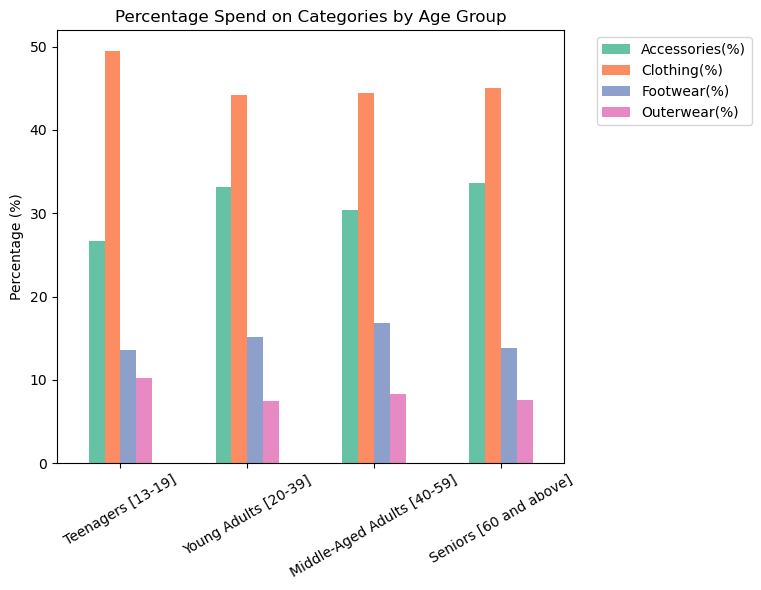

 --------FIGURE 4.2----------


In [29]:
colors = ['#66c2a5', '#fc8d62', '#8da0cb', '#e78ac3']
ax = percentage_spend.set_index('Age Groups').plot(kind='bar', figsize=(6, 6), color=colors)
ax.set_ylabel('Percentage (%)')
ax.set_xlabel('')
ax.set_title('Percentage Spend on Categories by Age Group')
plt.xticks(rotation=30)
plt.tight_layout()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.savefig("Fig1.png", bbox_inches = 'tight')

plt.show()

print(' --------FIGURE 4.2----------')



### Most Popular Product Category
- To analyse this, we used the amount of money each age group spent on each category relative to their total purchase amounts.The amount of times each category is purchased also tallies across all items so this was not analyzed.

- **Clothing**: Overall, clothing is the most popular category across all age groups with young adults, middle-aged and senior age groups spending on average, 45 percent of total expenditures on clothing items. Teenagers however come top in this category, spending more than all other age groups on clothing with almost 50 percent of their expenditures on clothing. 
- **Accessories:** this category comes in at a distant second with an average spend of 30 percent. Seniors spend the most at 34 percent while young adults spend slightly lower at 33 percent. Middle-Aged adults and Teenagers spend 30 percent and 27 percent respectively on accessories. It may be the case that accessories are not as in demand as clothes.
- **Footwear:** There is a 15 percent average spend on footwear with all age groups spending close to the same percentage on them. Middle-Aged Adults just slightly above the rest with 17 percent.
- **Outwear:** Outwears are the lowest with an average spend of 8 percent. Teenagers spend slightly higher than the others at 10 percent.